In [98]:
import sys
sys.path.append('../../src')
from SVM import GDSVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps

from sklearn.datasets import make_circles, make_classification, make_blobs
from sklearn.model_selection import train_test_split

## Generate synthetic data and visualize it

In [4]:
X, y = make_blobs(n_samples = 400, n_features=2, centers=2, cluster_std=[1,1], center_box=(-8,8), random_state=33)

In [11]:
print(f"Input data has the dimension {X.shape}")

Input data has the dimension (400, 2)


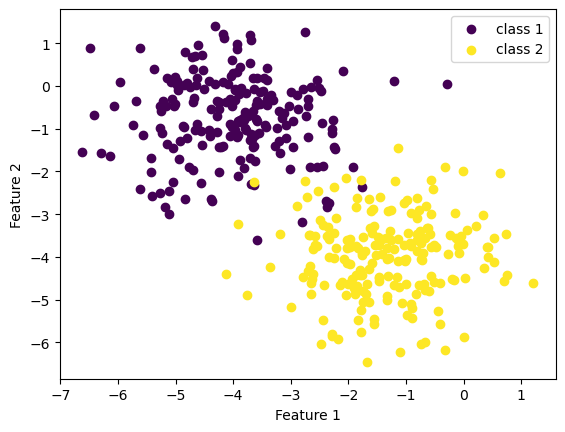

In [110]:
# Create a mask for different classes
mask1 = (y==0)
mask2 = (y==1)

# Create a list of colors from a colormap
cmap = colormaps['viridis']
colors = cmap(np.linspace(0,1,X.shape[1]))

# Use two scatter commands to separate the plotting of two classes to be able to use the legend
fig, ax = plt.subplots()
cls1 = ax.scatter(X[mask1,0], X[mask1, 1], color = colors[0], label="class 1")
cls2 = ax.scatter(X[mask2,0], X[mask2, 1], color = colors[1], label="class 2")
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(handles=[cls1, cls2]);

### Split data to train and test datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Apply SVC

### ML_from_scratch Package

In [21]:
mysvc = GDSVC(C=0.0016, random_seed=42)

In [23]:
mysvc.fit(X_train,y_train)

In [25]:
y_pred = mysvc.predict(X_test)

In [35]:
print(f"The weights of the model are {mysvc.weights} and the bias is {mysvc.bias}")

The weights of the model are [ 0.37429446 -0.24943762] and the bias is 0.22745279999999876


In [39]:
from metrics import accuracy_score

print(f"The GDSVC model has accuracy of {accuracy_score(y_test, y_pred)}")

The GDSVC model has accuracy of 0.98


#### Plot decision boundary

In [42]:
def plot_decision_boundary(model, X, features, y_true, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    X1, X2 = X[:,features[0]], X[:,features[1]]
    resolution = 1000
    x1 = np.linspace(np.min(X1)-1, np.max(X1)+1, resolution)
    x2 = np.linspace(np.min(X2)-1, np.max(X2)+1, resolution)
    xx1, xx2 = np.meshgrid(x1, x2)
    X_input = np.vstack((np.ravel(xx1), np.ravel(xx2))).T
    y_pred = model.predict(X_input)
    yy = y_pred.reshape(xx1.shape)
    ax.contourf(xx1,xx2,yy, alpha = 0.5)
    ax.scatter(X1,X2, c=y_true, edgecolor='k')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

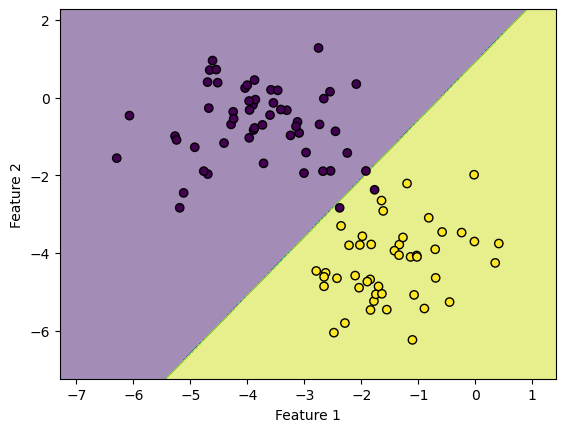

In [44]:
plot_decision_boundary(mysvc, X_test, features=(0,1), y_true=y_test)

### Scikit-learn Package

In [51]:
from sklearn.linear_model import SGDClassifier

In [53]:
sksvc = SGDClassifier(loss = 'hinge', random_state=42)

In [55]:
sksvc.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [57]:
sksvc.coef_[0]

array([ 16.47021197, -20.98821742])

In [59]:
sksvc.intercept_

array([-9.09166738])

#### Plot decision boundary using Scikit-learn

In [62]:
from sklearn.inspection import DecisionBoundaryDisplay

Text(0, 0.5, 'Feature 2')

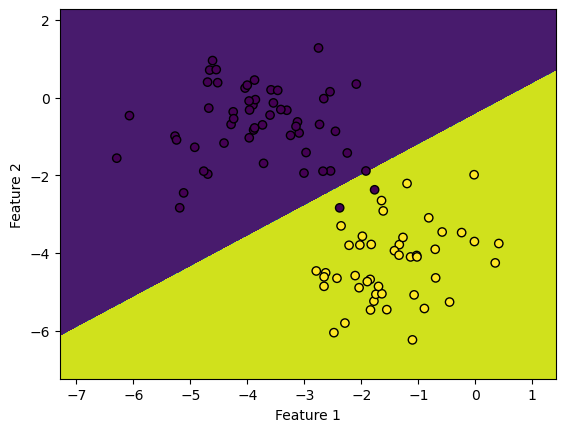

In [64]:
resolution = 1000
X1 = X_test[:,0]
X2 = X_test[:,1]
x1 = np.linspace(np.min(X1)-1, np.max(X1)+1, resolution)
x2 = np.linspace(np.min(X2)-1, np.max(X2)+1, resolution)
xx1, xx2 = np.meshgrid(x1, x2)
X_input = np.vstack((np.ravel(xx1), np.ravel(xx2))).T
y_pred = sksvc.predict(X_input)
y_pred = np.reshape(y_pred, xx1.shape)
decision = DecisionBoundaryDisplay(xx0=xx1,xx1=xx2,response = y_pred)
decision.plot()
plt.scatter(X1, X2, c = y_test, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

**Since the SGDClassifier uses a stochastic Gradient Descent, we expect the results to be slightly different. In this case, our model appears to be performing better. Having said that, a simple Gradient Descent is probably slower and not dynamic and therefore more limited in size of datasets it can handle and it cannot handle online training**